In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures      
import matplotlib.pyplot as plt

In [18]:
data = pd.read_csv(r'C:\Users\ishaq\ml\Position_Salaries.csv')
data.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [19]:
x = data.iloc[:, 1:2]
y = data.iloc[:, 2:]

In [20]:
#split the data into train and test sets
split_len = int(len(x) * 0.8)
x_train, x_test = data.iloc[:split_len, 1:2].values, data.iloc[split_len:, 1:2].values
y_train, y_test = data.iloc[:split_len, 2:].values, data.iloc[split_len:, 2:].values

In [21]:
# get polynomial features
polynomial_features_train = PolynomialFeatures(degree = 5)
# polynomial_features_test = PolynomialFeatures(degree = 5)
x_train_poly = polynomial_features_train.fit_transform(x_train)
# x_test_poly = polynomial_features_test.fit_transform(x_test)

In [22]:
# create the polynimoal regressor
polynomial_regressor = LinearRegression()
polynomial_regressor.fit(x_train_poly, y_train)

LinearRegression()

In [23]:
y_pred = polynomial_regressor.predict(polynomial_features_train.fit_transform(x_test))
y_pred

array([[513750.00000043],
       [958333.33333452]])

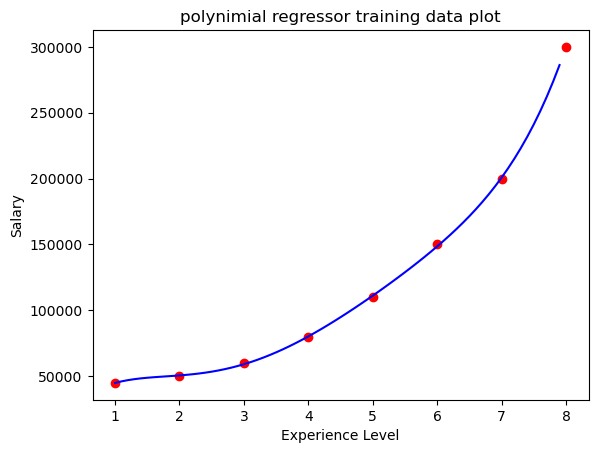

In [26]:
x_grid_train1 = np.arange(min(x_train), max(x_train), 0.1)
x_grid_train = x_grid_train.reshape((len(x_grid_train1), 1))
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_grid_train, polynomial_regressor.predict(polynomial_features_train.fit_transform(x_grid_train)), color = 'blue')
plt.title('polynimial regressor training data plot')
plt.xlabel('Experience Level')
plt.ylabel('Salary')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)

# Print the MSE
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 962586805.511905
